# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

You can check the output of `!nvidia-smi` to check which GPU you have.  Please uncomment the cell below if you'd like to do that.  Currently, RAPIDS runs on all available Colab GPU instances.

In [1]:
 !nvidia-smi

Wed Apr 10 13:59:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Setup:
This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Installs the **current stable version** of RAPIDSAI's core libraries using pip, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuxFilter
  1. cuCIM
  1. xgboost

**This will complete in about 5-6 minutes**

If you require installing the **nightly** releases of RAPIDSAI, please use the [RAPIDS Conda Colab Template notebook](https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9) and use the nightly parameter option when running the RAPIDS installation cell.


In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py



Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 460 (delta 131), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (460/460), 126.19 KiB | 2.47 MiB/s, done.
Resolving deltas: 100% (233/233), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 715.2 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.2.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.7/464.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 43

# RAPIDS is now installed on Colab.  
You can copy your code into the cells below or use the below to validate your RAPIDS installation and version.  
# Enjoy!

In [3]:
import cudf
print(cudf.__version__)

24.02.02


In [ ]:
import cuml
cuml.__version__

'23.10.00'

In [ ]:
import cugraph
cugraph.__version__

'23.10.00'

In [ ]:
import cuspatial
cuspatial.__version__

'23.10.00'

In [ ]:
import cuxfilter
cuxfilter.__version__

'23.10.00'

# Next Steps #

For an overview of how you can access and work with your own datasets in Colab, check out [this guide](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).

For more RAPIDS examples, check out our RAPIDS notebooks repos:
1. https://github.com/rapidsai/notebooks
2. https://github.com/rapidsai/notebooks-contrib

In [ ]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.2.2 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
dask-cuda 24.2.0 requires pandas<1.6.0.dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
dask-cudf-cu12 24.2.2 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


# EDA

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000  

/usr/local/lib/python3.10/dist-packages/cudf/core/dataframe.py:5106: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cudf/core/series.py:3319: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


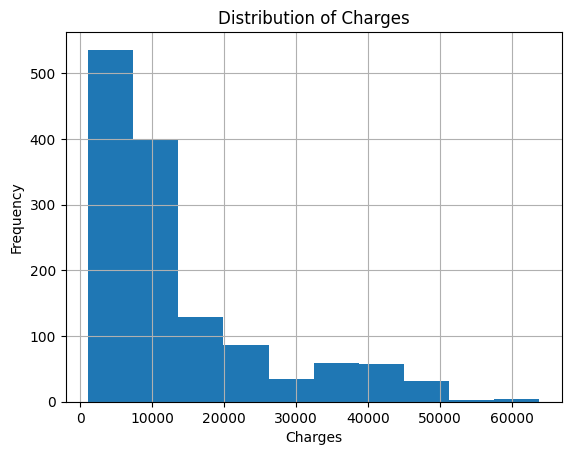

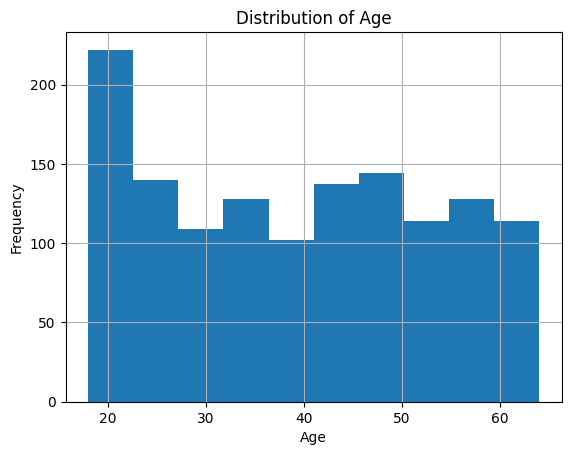

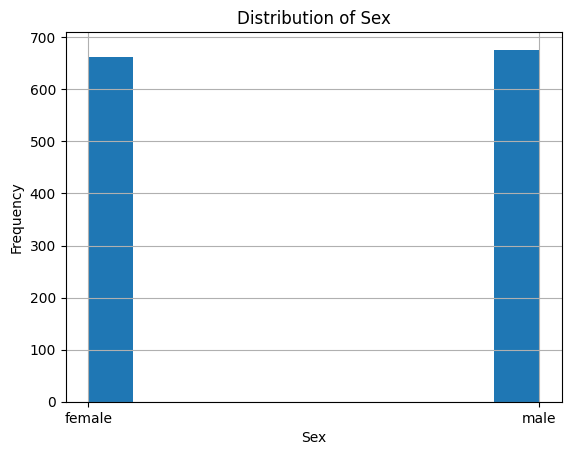

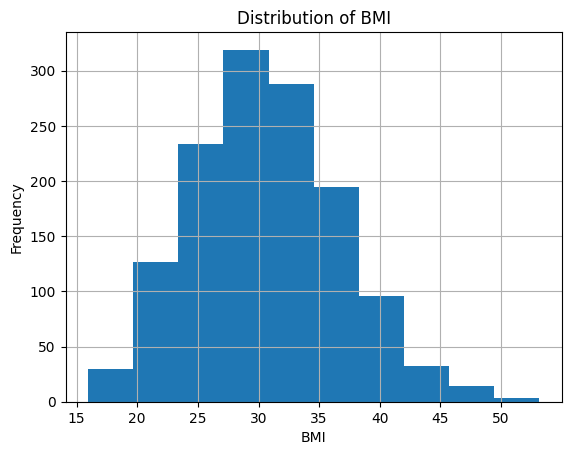

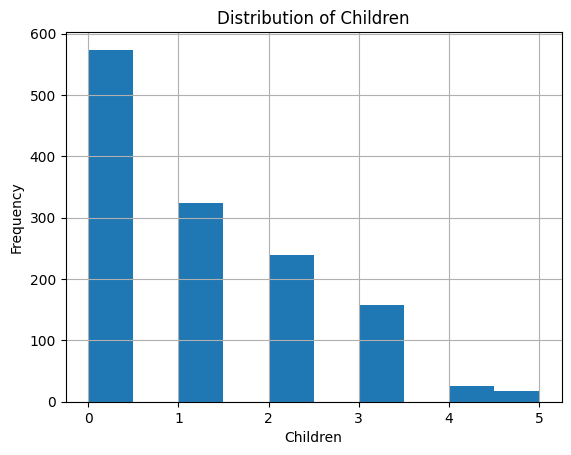

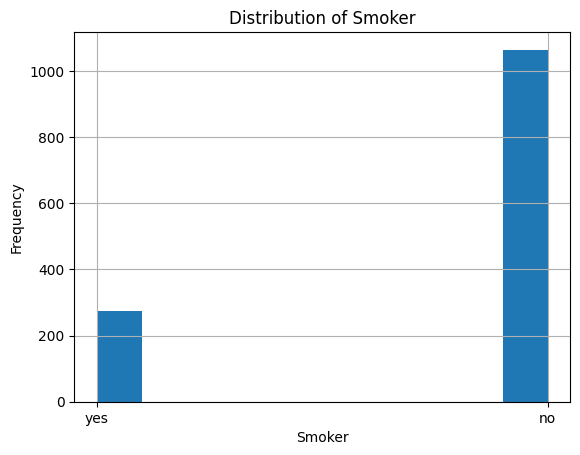

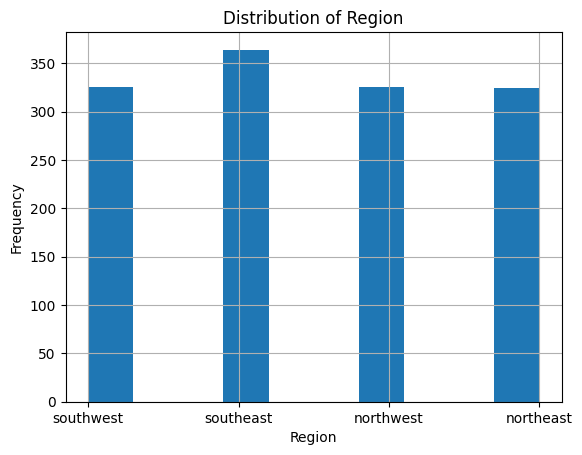

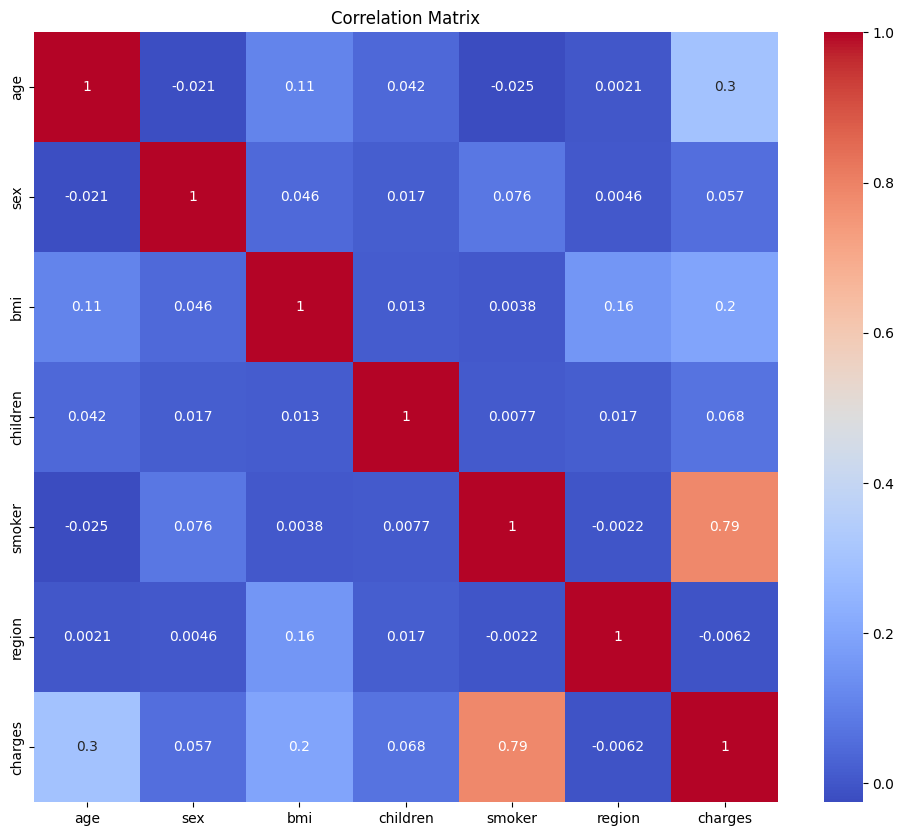

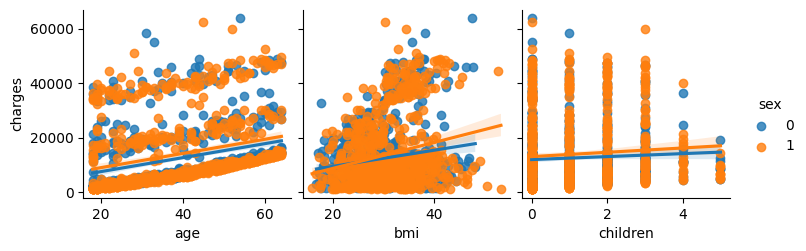

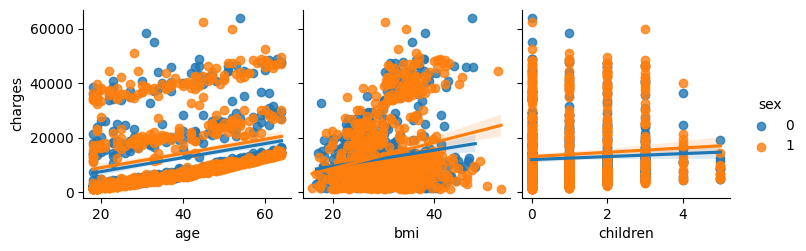

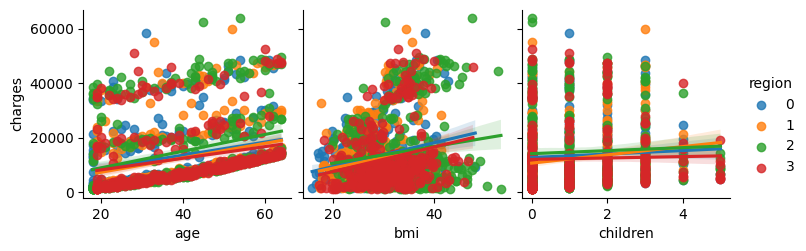

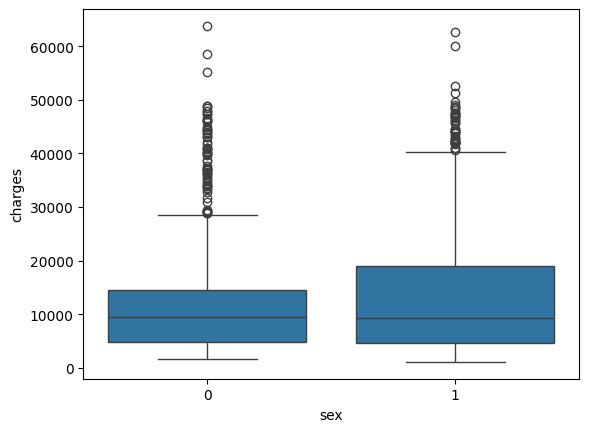

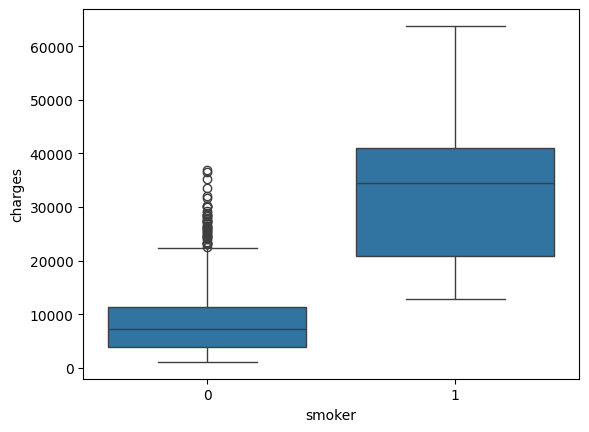

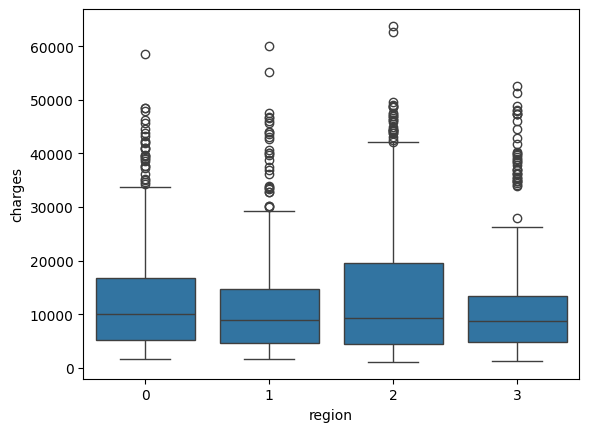

In [ ]:
import cudf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read the data using cudf
df = cudf.read_csv('insurance.csv')

# Display the first few rows
print(df.head())

# Check the shape of the DataFrame
print(df.shape)

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Histogram of 'charges'
df['charges'].to_pandas().hist()
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

# Histogram of 'age'
df['age'].to_pandas().hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

df['sex'].value_counts()
df['sex'].to_pandas().hist()
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.show()

df['bmi'].to_pandas().hist()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

df['children'].value_counts()
df['children'].to_pandas().hist()
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Distribution of Children')
plt.show()

df['smoker'].value_counts()
df['smoker'].to_pandas().hist()
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Smoker')
plt.show()

df['region'].value_counts()
df['region'].to_pandas().hist()
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Distribution of Region')
plt.show()

# Convert cudf DataFrame to pandas DataFrame
df_pandas = df.to_pandas()

# Label encoding with pandas DataFrame
le = LabelEncoder()
df_pandas['sex'] = le.fit_transform(df_pandas['sex'])
df_pandas['smoker'] = le.fit_transform(df_pandas['smoker'])
df_pandas['region'] = le.fit_transform(df_pandas['region'])

# Convert pandas DataFrame back to cudf DataFrame
df = cudf.from_pandas(df_pandas)

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr.to_pandas(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot with cuDF DataFrame
sns.pairplot(df_pandas, x_vars=['age', 'bmi', 'children'], y_vars='charges', hue='sex', kind='reg')
plt.show()

sns.pairplot(df_pandas, x_vars=['age', 'bmi', 'children'], y_vars='charges', hue='sex', kind='reg')
plt.show()

sns.pairplot(df_pandas, x_vars=['age', 'bmi', 'children'], y_vars='charges', hue='region', kind='reg')
plt.show()

# Boxplot for 'charges' vs 'sex'
sns.boxplot(x='sex', y='charges', data=df_pandas)
plt.show()

sns.boxplot(x='smoker', y='charges', data=df_pandas)
plt.show()

# Boxplot for 'charges' vs 'region'
sns.boxplot(x='region', y='charges', data=df_pandas)
plt.show()


# Model Building

Using device: cuda


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model 1: 13276.79
Model 2: 13276.52
Model 3: 13276.19


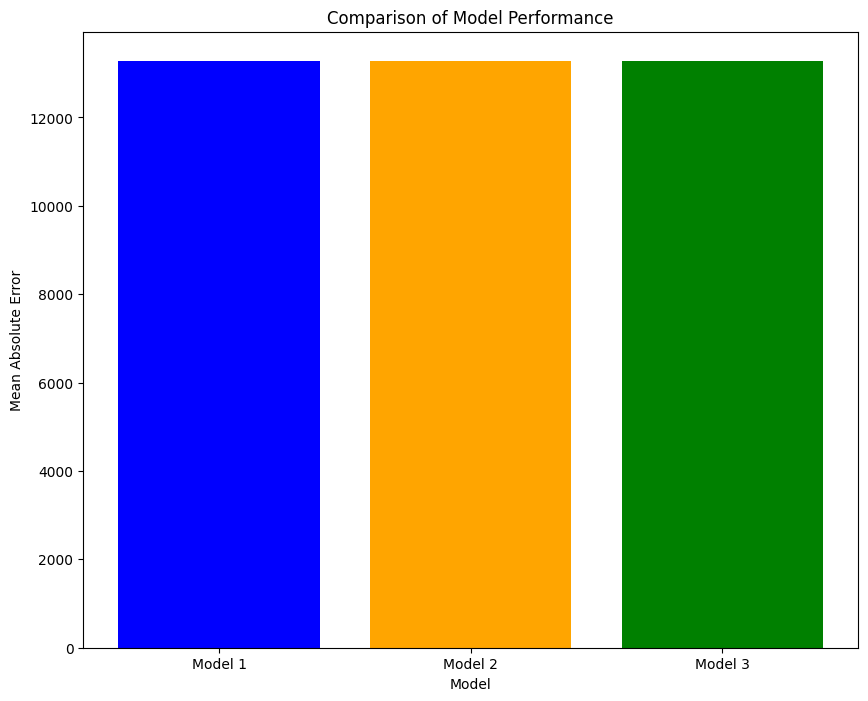

In [ ]:
import cudf
import cupy as cp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Load data with cuDF
df = cudf.read_csv('insurance.csv')
df = df.dropna()

X = df.drop('charges', axis=1)  # Input variables
y = df['charges']  # Output variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Preprocessing with cuDF
scaler = StandardScaler()
X_train_num = X_train.drop(['sex', 'smoker', 'region'], axis=1)
X_train_num = cp.asarray(scaler.fit_transform(X_train_num.values.get()))  # Use .values.get() to convert to NumPy array

encoder = OneHotEncoder(sparse=False)
X_train_cat = X_train[['sex', 'smoker', 'region']]
X_train_cat = encoder.fit_transform(X_train_cat.to_pandas())

X_train_cat = cp.asarray(X_train_cat)  # Convert to Cupy array

X_train = cp.concatenate((X_train_num, X_train_cat), axis=1)

X_test_num = X_test.drop(['sex', 'smoker', 'region'], axis=1)
X_test_num = cp.asarray(scaler.transform(X_test_num.values.get()))  # Use .values.get() to convert to NumPy array

X_test_cat = X_test[['sex', 'smoker', 'region']]
X_test_cat = encoder.transform(X_test_cat.to_pandas())

X_test_cat = cp.asarray(X_test_cat)  # Convert to Cupy array

X_test = cp.concatenate((X_test_num, X_test_cat), axis=1)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)  # Use .values attribute
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)  # Use .values attribute

# Define models
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

models = [Model(X_train.shape[1]), Model(X_train.shape[1]), Model(X_train.shape[1])]

# Move models to GPU if available
for model in models:
    model.to(device)

# Define loss function and optimizer
criterion = nn.L1Loss()
optimizer = [optim.Adam(model.parameters()) for model in models]

# Train models
maes = []
for model, opt in zip(models, optimizer):
    for epoch in range(50):
        model.train()
        opt.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs.squeeze(), y_train_tensor)
        loss.backward()
        opt.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        mae = mean_absolute_error(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
        maes.append(mae)

# Display results
model_names = ['Model 1', 'Model 2', 'Model 3']
results = dict(zip(model_names, maes))

for name, mae in results.items():
    print(f'{name}: {mae:.2f}')

# Plot results
plt.figure(figsize=(10,8))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Model Performance')
plt.show()


Using device: cuda


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNN: 3532.65
Linear Regression: 4243.65
Support Vector Regression: 8478.46
Decision Trees: 2868.22
Random Forest: 2576.46


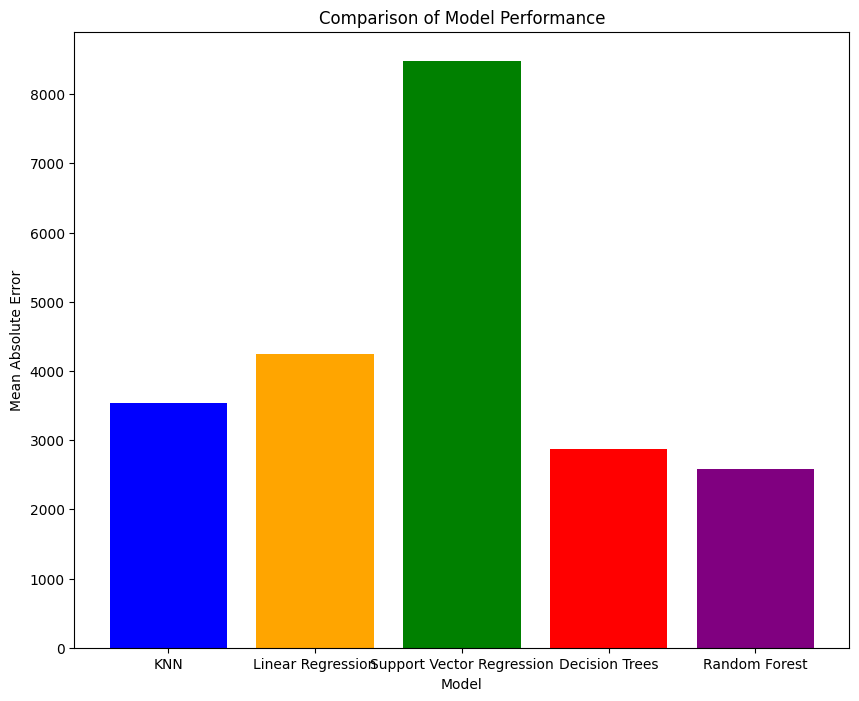

In [12]:
import cudf
import cupy as cp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Load data with cuDF
df = cudf.read_csv('insurance.csv')
df = df.dropna()

X = df.drop('charges', axis=1)  # Input variables
y = df['charges']  # Output variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Preprocessing with cuDF
scaler = StandardScaler()
X_train_num = X_train.drop(['sex', 'smoker', 'region'], axis=1)
X_train_num = cp.asarray(scaler.fit_transform(X_train_num.values.get()))  # Use .values.get() to convert to NumPy array

encoder = OneHotEncoder(sparse=False)
X_train_cat = X_train[['sex', 'smoker', 'region']]
X_train_cat = encoder.fit_transform(X_train_cat.to_pandas())

X_train_cat = cp.asarray(X_train_cat)  # Convert to Cupy array

X_train = cp.concatenate((X_train_num, X_train_cat), axis=1)

X_test_num = X_test.drop(['sex', 'smoker', 'region'], axis=1)
X_test_num = cp.asarray(scaler.transform(X_test_num.values.get()))  # Use .values.get() to convert to NumPy array

X_test_cat = X_test[['sex', 'smoker', 'region']]
X_test_cat = encoder.transform(X_test_cat.to_pandas())

X_test_cat = cp.asarray(X_test_cat)  # Convert to Cupy array

X_test = cp.concatenate((X_test_num, X_test_cat), axis=1)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)  # Use .values attribute
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)  # Use .values attribute

# Define models
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class SklearnModel:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Create instances of scikit-learn models
models = [
    SklearnModel(KNeighborsRegressor()),
    SklearnModel(LinearRegression()),
    SklearnModel(SVR()),
    SklearnModel(DecisionTreeRegressor()),
    SklearnModel(RandomForestRegressor())
]

model_names = ['KNN', 'Linear Regression', 'Support Vector Regression', 'Decision Trees', 'Random Forest']
errors = []

# Train and evaluate models
for model in models:
    if isinstance(model, NeuralNet):
        # Train neural network models
        model.to(device)
        criterion = nn.L1Loss()
        optimizer = optim.Adam(model.parameters())

        for epoch in range(50):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs.squeeze(), y_train_tensor)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred = model(X_test_tensor)
            error = mean_absolute_error(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
            errors.append(error)
    else:
        # Convert CuPy arrays to NumPy arrays
        X_train_np = cp.asnumpy(X_train)
        y_train_np = cp.asnumpy(y_train)
        X_test_np = cp.asnumpy(X_test)

        # Train scikit-learn models
        model.fit(X_train_np, y_train_np)
        y_pred = model.predict(X_test_np)
        error = mean_absolute_error(cp.asnumpy(y_test), y_pred)
        errors.append(error)


results = dict(zip(model_names, errors))

# Print results
for name, error in results.items():
    print(f'{name}: {error:.2f}')

# Plot results
plt.figure(figsize=(10,8))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Model Performance')
plt.show()
